In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("ICM_Data.csv")

In [3]:
df.groupby('MONITORID')['TOTAL_HH'].value_counts()

MONITORID  TOTAL_HH
1          7           334
2          7            41
3          7           314
4          7            14
5          7           228
                      ... 
839        7            14
842        7            24
843        7            22
           10            1
845        7             1
Name: TOTAL_HH, Length: 901, dtype: int64

In [4]:
df.head()

,ICM_ID,MONITORID,UCID,CAMP_ID,CAMP_DAY,DAY_WORK,CLUSTER_NUMBER,TOTAL_HH,HRMP,TEAM_NUMBER,...,NT_VAC,TVBM_VAC,NA_VAC,ASLEEP_VAC,REFUSAL_VAC,OTHER_VAC,VBNFM_VAC,CORRECT_DOOR_MARK,ZERO_DOSE_023,CLUSTER_DATE
0,1,224,5191,1,1,1,1,7,1,1,...,0,0,0,0,0,0,0,7,0,3/8/2020
1,2,84,5163,1,1,1,1,7,2,4,...,0,0,0,0,0,1,0,7,0,3/9/2020
2,3,405,5167,1,1,1,1,7,2,2,...,0,0,0,0,0,0,0,7,0,3/9/2020
3,4,405,5167,1,1,1,2,7,2,1,...,0,0,0,0,0,0,0,7,0,3/9/2020
4,5,184,5112,1,1,1,1,7,2,2,...,0,0,0,0,0,0,0,7,0,3/9/2020


In [5]:
df.isnull().sum()

ICM_ID               0
MONITORID            0
UCID                 0
CAMP_ID              0
CAMP_DAY             0
DAY_WORK             0
CLUSTER_NUMBER       0
TOTAL_HH             0
HRMP                 0
TEAM_NUMBER          0
RECALL_011_CHK       0
RECALL_011_VAC       0
RECALL_1259_CHK      0
RECALL_1259_VAC      0
NT                   0
TVBMC                0
NA                   0
ASLEEP               0
REFUSAL              0
OTHER_REASON         0
GUEST_CHK            0
GUEST_VAC            0
FM_059_CHK           0
FM_059_VAC           0
VBNFM                0
NT_VAC               0
TVBM_VAC             0
NA_VAC               0
ASLEEP_VAC           0
REFUSAL_VAC          0
OTHER_VAC            0
VBNFM_VAC            0
CORRECT_DOOR_MARK    0
ZERO_DOSE_023        0
CLUSTER_DATE         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120378 entries, 0 to 120377
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ICM_ID             120378 non-null  int64 
 1   MONITORID          120378 non-null  int64 
 2   UCID               120378 non-null  int64 
 3   CAMP_ID            120378 non-null  int64 
 4   CAMP_DAY           120378 non-null  int64 
 5   DAY_WORK           120378 non-null  int64 
 6   CLUSTER_NUMBER     120378 non-null  int64 
 7   TOTAL_HH           120378 non-null  int64 
 8   HRMP               120378 non-null  int64 
 9   TEAM_NUMBER        120378 non-null  int64 
 10  RECALL_011_CHK     120378 non-null  int64 
 11  RECALL_011_VAC     120378 non-null  int64 
 12  RECALL_1259_CHK    120378 non-null  int64 
 13  RECALL_1259_VAC    120378 non-null  int64 
 14  NT                 120378 non-null  int64 
 15  TVBMC              120378 non-null  int64 
 16  NA                 1

In [7]:
len(df['UCID'].value_counts())

104

In [8]:
len(df['MONITORID'].value_counts())

788

In [19]:
import pandas as pd

sum_na = df.groupby(['MONITORID', 'UCID'])['NA'].sum().reset_index()

df_merged = pd.merge(df, sum_na, on=['MONITORID', 'UCID'], how='left', suffixes=('', '_SUM'))



In [20]:
len(df_merged)

120378

In [21]:
len(df)

120378

In [22]:

df_merged.head()

,ICM_ID,MONITORID,UCID,CAMP_ID,CAMP_DAY,DAY_WORK,CLUSTER_NUMBER,TOTAL_HH,HRMP,TEAM_NUMBER,RECALL_011_CHK,RECALL_011_VAC,RECALL_1259_CHK,RECALL_1259_VAC,NT,TVBMC,NA,ASLEEP,REFUSAL,OTHER_REASON,GUEST_CHK,GUEST_VAC,FM_059_CHK,FM_059_VAC,VBNFM,NT_VAC,TVBM_VAC,NA_VAC,ASLEEP_VAC,REFUSAL_VAC,OTHER_VAC,VBNFM_VAC,CORRECT_DOOR_MARK,ZERO_DOSE_023,CLUSTER_DATE,NA_SUM
0,1,224,5191,1,1,1,1,7,1,1,6,5,20,17,0,0,4,0,0,0,1,1,13,13,0,0,0,0,0,0,0,0,7,0,3/8/2020,145
1,2,84,5163,1,1,1,1,7,2,4,5,4,20,17,0,0,3,0,0,1,1,0,13,12,0,0,0,0,0,0,1,0,7,0,3/9/2020,463
2,3,405,5167,1,1,1,1,7,2,2,3,3,10,10,0,0,0,0,0,0,1,1,12,12,0,0,0,0,0,0,0,0,7,0,3/9/2020,2
3,4,405,5167,1,1,1,2,7,2,1,2,2,8,4,0,0,2,0,2,0,0,0,6,6,0,0,0,0,0,0,0,0,7,0,3/9/2020,2
4,5,184,5112,1,1,1,1,7,2,2,5,4,13,13,0,0,1,0,0,0,0,0,14,14,0,0,0,0,0,0,0,0,7,0,3/9/2020,10


In [23]:
df_merged[df_merged['MONITORID']==1]

,ICM_ID,MONITORID,UCID,CAMP_ID,CAMP_DAY,DAY_WORK,CLUSTER_NUMBER,TOTAL_HH,HRMP,TEAM_NUMBER,RECALL_011_CHK,RECALL_011_VAC,RECALL_1259_CHK,RECALL_1259_VAC,NT,TVBMC,NA,ASLEEP,REFUSAL,OTHER_REASON,GUEST_CHK,GUEST_VAC,FM_059_CHK,FM_059_VAC,VBNFM,NT_VAC,TVBM_VAC,NA_VAC,ASLEEP_VAC,REFUSAL_VAC,OTHER_VAC,VBNFM_VAC,CORRECT_DOOR_MARK,ZERO_DOSE_023,CLUSTER_DATE,NA_SUM
944,946,1,5112,1,1,1,1,7,2,1,4,4,17,15,0,0,2,0,0,0,3,3,19,19,0,0,0,0,0,0,0,0,7,0,3/9/2020,441
980,982,1,5112,1,1,1,2,7,2,2,0,0,13,11,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,3/9/2020,441
2192,2220,1,5112,1,2,1,1,7,2,2,5,5,10,9,0,0,1,0,0,0,0,0,14,14,0,0,0,0,0,0,0,0,7,2,3/10/2020,441
2971,3005,1,5112,1,3,3,2,7,2,1,2,2,11,10,0,0,0,0,1,0,0,0,12,12,0,0,0,0,0,0,0,0,7,1,3/11/2020,441
3818,3852,1,5112,1,4,4,1,7,2,1,0,0,12,12,0,0,0,0,0,0,0,0,12,12,0,0,0,0,0,0,0,0,7,0,3/12/2020,441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119246,119591,1,5112,34,3,3,2,7,2,3,2,2,15,15,0,0,0,0,0,0,0,0,17,17,0,0,0,0,0,0,0,0,7,0,5/1/2024,441
119808,120154,1,5112,34,4,4,1,7,2,2,3,3,11,11,0,0,0,0,0,0,0,0,14,14,0,0,0,0,0,0,0,0,7,0,5/2/2024,441
119814,120160,1,5112,34,4,4,2,7,2,1,1,1,21,20,0,0,1,0,0,0,2,2,20,19,0,0,0,1,0,0,0,0,7,0,5/2/2024,441
120370,120719,1,5112,34,5,4,1,7,2,2,5,5,16,14,0,0,2,0,0,0,0,0,20,20,0,0,0,0,0,0,0,0,7,0,5/3/2024,441


In [24]:
df_merged['CAMP_DAY'].value_counts()

2    25071
3    24618
1    24214
4    23398
5    23075
0        2
Name: CAMP_DAY, dtype: int64

In [25]:
# df_merged =df_merged.drop(['CAMP_DAY'], axis=1)

In [26]:
df_merged.head()

,ICM_ID,MONITORID,UCID,CAMP_ID,CAMP_DAY,DAY_WORK,CLUSTER_NUMBER,TOTAL_HH,HRMP,TEAM_NUMBER,RECALL_011_CHK,RECALL_011_VAC,RECALL_1259_CHK,RECALL_1259_VAC,NT,TVBMC,NA,ASLEEP,REFUSAL,OTHER_REASON,GUEST_CHK,GUEST_VAC,FM_059_CHK,FM_059_VAC,VBNFM,NT_VAC,TVBM_VAC,NA_VAC,ASLEEP_VAC,REFUSAL_VAC,OTHER_VAC,VBNFM_VAC,CORRECT_DOOR_MARK,ZERO_DOSE_023,CLUSTER_DATE,NA_SUM
0,1,224,5191,1,1,1,1,7,1,1,6,5,20,17,0,0,4,0,0,0,1,1,13,13,0,0,0,0,0,0,0,0,7,0,3/8/2020,145
1,2,84,5163,1,1,1,1,7,2,4,5,4,20,17,0,0,3,0,0,1,1,0,13,12,0,0,0,0,0,0,1,0,7,0,3/9/2020,463
2,3,405,5167,1,1,1,1,7,2,2,3,3,10,10,0,0,0,0,0,0,1,1,12,12,0,0,0,0,0,0,0,0,7,0,3/9/2020,2
3,4,405,5167,1,1,1,2,7,2,1,2,2,8,4,0,0,2,0,2,0,0,0,6,6,0,0,0,0,0,0,0,0,7,0,3/9/2020,2
4,5,184,5112,1,1,1,1,7,2,2,5,4,13,13,0,0,1,0,0,0,0,0,14,14,0,0,0,0,0,0,0,0,7,0,3/9/2020,10


In [27]:


pd.set_option('display.max_columns', None)


In [28]:
df_merged.head()

,ICM_ID,MONITORID,UCID,CAMP_ID,CAMP_DAY,DAY_WORK,CLUSTER_NUMBER,TOTAL_HH,HRMP,TEAM_NUMBER,RECALL_011_CHK,RECALL_011_VAC,RECALL_1259_CHK,RECALL_1259_VAC,NT,TVBMC,NA,ASLEEP,REFUSAL,OTHER_REASON,GUEST_CHK,GUEST_VAC,FM_059_CHK,FM_059_VAC,VBNFM,NT_VAC,TVBM_VAC,NA_VAC,ASLEEP_VAC,REFUSAL_VAC,OTHER_VAC,VBNFM_VAC,CORRECT_DOOR_MARK,ZERO_DOSE_023,CLUSTER_DATE,NA_SUM
0,1,224,5191,1,1,1,1,7,1,1,6,5,20,17,0,0,4,0,0,0,1,1,13,13,0,0,0,0,0,0,0,0,7,0,3/8/2020,145
1,2,84,5163,1,1,1,1,7,2,4,5,4,20,17,0,0,3,0,0,1,1,0,13,12,0,0,0,0,0,0,1,0,7,0,3/9/2020,463
2,3,405,5167,1,1,1,1,7,2,2,3,3,10,10,0,0,0,0,0,0,1,1,12,12,0,0,0,0,0,0,0,0,7,0,3/9/2020,2
3,4,405,5167,1,1,1,2,7,2,1,2,2,8,4,0,0,2,0,2,0,0,0,6,6,0,0,0,0,0,0,0,0,7,0,3/9/2020,2
4,5,184,5112,1,1,1,1,7,2,2,5,4,13,13,0,0,1,0,0,0,0,0,14,14,0,0,0,0,0,0,0,0,7,0,3/9/2020,10


In [29]:

columns_to_drop = ['NT_VAC', 'TVBM_VAC', 'NA_VAC', 'ASLEEP_VAC', 'REFUSAL_VAC', 'OTHER_VAC', 'VBNFM_VAC', 'CORRECT_DOOR_MARK', 'ZERO_DOSE_023']


existing_columns = df_merged.columns.tolist()
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]
df_merged = df_merged.drop(columns_to_drop, axis=1)



In [30]:
df_merged=df_merged.drop('NA_SUM', axis=1)

In [31]:
df_merged.head()

,ICM_ID,MONITORID,UCID,CAMP_ID,CAMP_DAY,DAY_WORK,CLUSTER_NUMBER,TOTAL_HH,HRMP,TEAM_NUMBER,RECALL_011_CHK,RECALL_011_VAC,RECALL_1259_CHK,RECALL_1259_VAC,NT,TVBMC,NA,ASLEEP,REFUSAL,OTHER_REASON,GUEST_CHK,GUEST_VAC,FM_059_CHK,FM_059_VAC,VBNFM,CLUSTER_DATE
0,1,224,5191,1,1,1,1,7,1,1,6,5,20,17,0,0,4,0,0,0,1,1,13,13,0,3/8/2020
1,2,84,5163,1,1,1,1,7,2,4,5,4,20,17,0,0,3,0,0,1,1,0,13,12,0,3/9/2020
2,3,405,5167,1,1,1,1,7,2,2,3,3,10,10,0,0,0,0,0,0,1,1,12,12,0,3/9/2020
3,4,405,5167,1,1,1,2,7,2,1,2,2,8,4,0,0,2,0,2,0,0,0,6,6,0,3/9/2020
4,5,184,5112,1,1,1,1,7,2,2,5,4,13,13,0,0,1,0,0,0,0,0,14,14,0,3/9/2020


In [32]:
ValueCountLess_3 = df_merged['TOTAL_HH'].value_counts()
ValueCountLess_3=ValueCountLess_3[ValueCountLess_3>3]

df_merged['TOTAL_HH'] = df_merged['TOTAL_HH'].apply(lambda x :x if x in ValueCountLess_3 else None)

In [33]:
df_merged.head()

,ICM_ID,MONITORID,UCID,CAMP_ID,CAMP_DAY,DAY_WORK,CLUSTER_NUMBER,TOTAL_HH,HRMP,TEAM_NUMBER,RECALL_011_CHK,RECALL_011_VAC,RECALL_1259_CHK,RECALL_1259_VAC,NT,TVBMC,NA,ASLEEP,REFUSAL,OTHER_REASON,GUEST_CHK,GUEST_VAC,FM_059_CHK,FM_059_VAC,VBNFM,CLUSTER_DATE
0,1,224,5191,1,1,1,1,7.0,1,1,6,5,20,17,0,0,4,0,0,0,1,1,13,13,0,3/8/2020
1,2,84,5163,1,1,1,1,7.0,2,4,5,4,20,17,0,0,3,0,0,1,1,0,13,12,0,3/9/2020
2,3,405,5167,1,1,1,1,7.0,2,2,3,3,10,10,0,0,0,0,0,0,1,1,12,12,0,3/9/2020
3,4,405,5167,1,1,1,2,7.0,2,1,2,2,8,4,0,0,2,0,2,0,0,0,6,6,0,3/9/2020
4,5,184,5112,1,1,1,1,7.0,2,2,5,4,13,13,0,0,1,0,0,0,0,0,14,14,0,3/9/2020


In [34]:
df_merged.isnull().sum()

ICM_ID              0
MONITORID           0
UCID                0
CAMP_ID             0
CAMP_DAY            0
DAY_WORK            0
CLUSTER_NUMBER      0
TOTAL_HH           20
HRMP                0
TEAM_NUMBER         0
RECALL_011_CHK      0
RECALL_011_VAC      0
RECALL_1259_CHK     0
RECALL_1259_VAC     0
NT                  0
TVBMC               0
NA                  0
ASLEEP              0
REFUSAL             0
OTHER_REASON        0
GUEST_CHK           0
GUEST_VAC           0
FM_059_CHK          0
FM_059_VAC          0
VBNFM               0
CLUSTER_DATE        0
dtype: int64

In [35]:
df_merged = df_merged.dropna()

In [36]:
df_merged['TOTAL_HH'] = df_merged['TOTAL_HH'].astype(int)

In [37]:
df_merged["NON_VAC_011"] = df_merged['RECALL_011_CHK'] - df_merged['RECALL_011_VAC']

In [38]:
df_merged['NON_VAC_1259'] = df_merged['RECALL_1259_CHK'] - df_merged['RECALL_1259_VAC']

In [39]:
clusters_to_keep = df_merged['CLUSTER_NUMBER'].value_counts()[lambda x: x > 1].index
df_filtered = df_merged[df_merged['CLUSTER_NUMBER'].isin(clusters_to_keep)]

In [40]:
df_filtered.head()

,ICM_ID,MONITORID,UCID,CAMP_ID,CAMP_DAY,DAY_WORK,CLUSTER_NUMBER,TOTAL_HH,HRMP,TEAM_NUMBER,RECALL_011_CHK,RECALL_011_VAC,RECALL_1259_CHK,RECALL_1259_VAC,NT,TVBMC,NA,ASLEEP,REFUSAL,OTHER_REASON,GUEST_CHK,GUEST_VAC,FM_059_CHK,FM_059_VAC,VBNFM,CLUSTER_DATE,NON_VAC_011,NON_VAC_1259
0,1,224,5191,1,1,1,1,7,1,1,6,5,20,17,0,0,4,0,0,0,1,1,13,13,0,3/8/2020,1,3
1,2,84,5163,1,1,1,1,7,2,4,5,4,20,17,0,0,3,0,0,1,1,0,13,12,0,3/9/2020,1,3
2,3,405,5167,1,1,1,1,7,2,2,3,3,10,10,0,0,0,0,0,0,1,1,12,12,0,3/9/2020,0,0
3,4,405,5167,1,1,1,2,7,2,1,2,2,8,4,0,0,2,0,2,0,0,0,6,6,0,3/9/2020,0,4
4,5,184,5112,1,1,1,1,7,2,2,5,4,13,13,0,0,1,0,0,0,0,0,14,14,0,3/9/2020,1,0


In [41]:
df_filtered['HRMP']=df_filtered['HRMP'].replace(2 ,0)
df_filtered['HRMP']=df_filtered['HRMP'].replace(1 , 1)

C:\Users\BS\AppData\Local\Temp\ipykernel_19708\1306245396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['HRMP']=df_filtered['HRMP'].replace(2 ,0)
C:\Users\BS\AppData\Local\Temp\ipykernel_19708\1306245396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['HRMP']=df_filtered['HRMP'].replace(1 , 1)


In [42]:
df_filtered['NON_VEC_GUEST']= df_filtered['GUEST_CHK'] - df_filtered['GUEST_VAC']

C:\Users\BS\AppData\Local\Temp\ipykernel_19708\1061325615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['NON_VEC_GUEST']= df_filtered['GUEST_CHK'] - df_filtered['GUEST_VAC']


In [43]:
df_filtered.head()

,ICM_ID,MONITORID,UCID,CAMP_ID,CAMP_DAY,DAY_WORK,CLUSTER_NUMBER,TOTAL_HH,HRMP,TEAM_NUMBER,RECALL_011_CHK,RECALL_011_VAC,RECALL_1259_CHK,RECALL_1259_VAC,NT,TVBMC,NA,ASLEEP,REFUSAL,OTHER_REASON,GUEST_CHK,GUEST_VAC,FM_059_CHK,FM_059_VAC,VBNFM,CLUSTER_DATE,NON_VAC_011,NON_VAC_1259,NON_VEC_GUEST
0,1,224,5191,1,1,1,1,7,1,1,6,5,20,17,0,0,4,0,0,0,1,1,13,13,0,3/8/2020,1,3,0
1,2,84,5163,1,1,1,1,7,0,4,5,4,20,17,0,0,3,0,0,1,1,0,13,12,0,3/9/2020,1,3,1
2,3,405,5167,1,1,1,1,7,0,2,3,3,10,10,0,0,0,0,0,0,1,1,12,12,0,3/9/2020,0,0,0
3,4,405,5167,1,1,1,2,7,0,1,2,2,8,4,0,0,2,0,2,0,0,0,6,6,0,3/9/2020,0,4,0
4,5,184,5112,1,1,1,1,7,0,2,5,4,13,13,0,0,1,0,0,0,0,0,14,14,0,3/9/2020,1,0,0


In [44]:
df_filtered= df_filtered.drop('CLUSTER_DATE',axis=1)

In [45]:
df_filtered['FM_NON_VEC_059'] =df_filtered['FM_059_CHK'] - df_filtered['FM_059_VAC']

In [46]:
numeric_cols = df_merged.select_dtypes(include=np.number).columns
cols_to_exclude = ['UCID', 'DAY_WORK', 'CLUSTER_NUMBER', 'HRMP', 'TEAM_NUMBER', 'ICM_ID']
cols_to_sum = [col for col in numeric_cols if col not in cols_to_exclude and col != 'MONITORID' and col != 'CAMP_ID']
summed_df = df_merged.groupby(['MONITORID','CAMP_ID'])[cols_to_sum].sum().reset_index()
summed_df
len(summed_df)

10907

In [47]:
summed_df

,MONITORID,CAMP_ID,CAMP_DAY,TOTAL_HH,RECALL_011_CHK,RECALL_011_VAC,RECALL_1259_CHK,RECALL_1259_VAC,NT,TVBMC,NA,ASLEEP,REFUSAL,OTHER_REASON,GUEST_CHK,GUEST_VAC,FM_059_CHK,FM_059_VAC,VBNFM,NON_VAC_011,NON_VAC_1259
0,1,1,28,63,27,25,120,107,0,0,13,0,2,0,3,3,106,106,0,2,13
1,1,2,8,28,22,20,52,39,0,0,15,0,0,0,1,1,56,56,0,2,13
2,1,4,38,70,46,42,132,118,0,0,18,0,0,0,16,16,125,125,0,4,14
3,1,5,10,35,22,21,83,74,0,0,10,0,0,0,0,0,81,81,0,1,9
4,1,6,37,84,33,30,154,143,0,0,12,0,2,0,0,0,156,156,0,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,843,30,15,38,20,16,49,42,0,0,11,0,0,0,2,2,41,39,0,4,7
10903,843,31,15,35,10,7,56,50,0,0,5,3,0,1,1,1,15,15,0,3,6
10904,843,32,15,35,14,9,59,41,0,0,7,15,1,0,5,2,38,38,0,5,18
10905,843,33,15,35,10,9,54,44,0,0,10,1,0,0,2,2,43,42,0,1,10


In [48]:
target_variable = 'NA'
correlation_matrix = summed_df.corr()
target_correlations = correlation_matrix[target_variable].abs().sort_values(ascending=False)

top_10_features = target_correlations.drop(target_variable).head(12)

print("Top 10 features most correlated with the target variable:")
print(top_10_features)

Top 10 features most correlated with the target variable:
NON_VAC_1259       0.894128
RECALL_1259_CHK    0.770217
TOTAL_HH           0.741573
NON_VAC_011        0.731641
CAMP_DAY           0.729770
RECALL_011_CHK     0.717089
RECALL_1259_VAC    0.684360
FM_059_CHK         0.644077
RECALL_011_VAC     0.643597
FM_059_VAC         0.627300
GUEST_CHK          0.347019
REFUSAL            0.340590
Name: NA, dtype: float64


In [49]:
camp_ID=df['CAMP_ID'].unique()

In [50]:

top_features_df = summed_df[['MONITORID', 'NA',"CAMP_ID"] + top_10_features.index.tolist()]
top_features_df.head()

,MONITORID,NA,CAMP_ID,NON_VAC_1259,RECALL_1259_CHK,TOTAL_HH,NON_VAC_011,CAMP_DAY,RECALL_011_CHK,RECALL_1259_VAC,FM_059_CHK,RECALL_011_VAC,FM_059_VAC,GUEST_CHK,REFUSAL
0,1,13,1,13,120,63,2,28,27,107,106,25,106,3,2
1,1,15,2,13,52,28,2,8,22,39,56,20,56,1,0
2,1,18,4,14,132,70,4,38,46,118,125,42,125,16,0
3,1,10,5,9,83,35,1,10,22,74,81,21,81,0,0
4,1,12,6,11,154,84,3,37,33,143,156,30,156,0,2


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




X = top_features_df.drop(['MONITORID', 'NA',"CAMP_ID"], axis=1)
y = top_features_df["NA"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R2 Score": r2_score(y_test, y_pred)
    }

results

{'Linear Regression': {'MAE': 2.025216024814839,
  'MSE': 11.759824563018313,
  'R2 Score': 0.9355501708929052},
 'Ridge Regression': {'MAE': 2.025469947280172,
  'MSE': 11.749367335511009,
  'R2 Score': 0.9356074818265988},
 'Lasso Regression': {'MAE': 3.016311839654168,
  'MSE': 18.50411703340377,
  'R2 Score': 0.8985880125855839},
 'Random Forest': {'MAE': 2.139527956003666,
  'MSE': 12.900863657195233,
  'R2 Score': 0.9292966954069288},
 'Decision Tree': {'MAE': 2.9381301558203483,
  'MSE': 24.463336388634282,
  'R2 Score': 0.8659284548687022},
 'Support Vector Regressor': {'MAE': 2.0368117178097984,
  'MSE': 17.15893222383242,
  'R2 Score': 0.905960310584567},
 'K-Nearest Neighbors': {'MAE': 3.122456461961503,
  'MSE': 20.90922089825848,
  'R2 Score': 0.8854068182366339}}

In [52]:
X.head()

,NON_VAC_1259,RECALL_1259_CHK,TOTAL_HH,NON_VAC_011,CAMP_DAY,RECALL_011_CHK,RECALL_1259_VAC,FM_059_CHK,RECALL_011_VAC,FM_059_VAC,GUEST_CHK,REFUSAL
0,13,120,63,2,28,27,107,106,25,106,3,2
1,13,52,28,2,8,22,39,56,20,56,1,0
2,14,132,70,4,38,46,118,125,42,125,16,0
3,9,83,35,1,10,22,74,81,21,81,0,0
4,11,154,84,3,37,33,143,156,30,156,0,2


In [53]:
results_df = pd.DataFrame(results).T
results_df

,MAE,MSE,R2 Score
Linear Regression,2.025216,11.759825,0.935550
Ridge Regression,2.025470,11.749367,0.935607
Lasso Regression,3.016312,18.504117,0.898588
Random Forest,2.139528,12.900864,0.929297
Decision Tree,2.938130,24.463336,0.865928
Support Vector Regressor,2.036812,17.158932,0.905960
K-Nearest Neighbors,3.122456,20.909221,0.885407


In [54]:
top_features_df.head()

,MONITORID,NA,CAMP_ID,NON_VAC_1259,RECALL_1259_CHK,TOTAL_HH,NON_VAC_011,CAMP_DAY,RECALL_011_CHK,RECALL_1259_VAC,FM_059_CHK,RECALL_011_VAC,FM_059_VAC,GUEST_CHK,REFUSAL
0,1,13,1,13,120,63,2,28,27,107,106,25,106,3,2
1,1,15,2,13,52,28,2,8,22,39,56,20,56,1,0
2,1,18,4,14,132,70,4,38,46,118,125,42,125,16,0
3,1,10,5,9,83,35,1,10,22,74,81,21,81,0,0
4,1,12,6,11,154,84,3,37,33,143,156,30,156,0,2


In [55]:
top_features_df.to_csv('top_features_df.csv', index=False)

In [58]:
X = top_features_df.drop(['MONITORID', 'NA', 'CAMP_ID'], axis=1)
y = top_features_df["NA"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

def predict_na_for_monitor(monitor_id, camp_id, features_df):

    monitor_data = features_df[(features_df['MONITORID'] == monitor_id) & (features_df['CAMP_ID'] == camp_id)]

    if not monitor_data.empty:

      features = monitor_data.drop(['MONITORID', 'NA', 'CAMP_ID'], axis=1)
      features_scaled = scaler.transform(features)
      predicted_na = model.predict(features_scaled)[0]

      return predicted_na
    else:
      print(f"No data found for MONITORID {monitor_id} and CAMP_ID {camp_id}")

camp_id_to_use = 3

predicted_na = predict_na_for_monitor(54, camp_id_to_use, top_features_df)

if predicted_na is not None:
  print(f"Predicted NA for MONITORID 235 and CAMP_ID {camp_id_to_use}: {int(predicted_na)}")



No data found for MONITORID 54 and CAMP_ID 3


In [61]:
top_features_df[(top_features_df['MONITORID']==54) & (top_features_df['CAMP_ID']==3)]['NA']

Series([], Name: NA, dtype: int64)

In [ ]:
X_test
# top_features_df.loc[839]

,NON_VAC_1259,RECALL_1259_CHK,TOTAL_HH,NON_VAC_011,CAMP_DAY,RECALL_011_CHK,RECALL_1259_VAC,FM_059_CHK,RECALL_011_VAC,FM_059_VAC,GUEST_CHK,REFUSAL
3971,18,190,70,1,30,28,172,144,27,140,28,1
6855,27,149,63,2,28,35,122,90,33,87,3,9
839,6,72,35,0,15,17,66,47,17,47,3,0
5349,16,178,91,5,40,41,162,126,36,125,3,2
1393,7,148,77,3,33,43,141,144,40,142,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2564,21,146,98,6,45,47,125,103,41,94,5,7
8574,32,218,105,11,48,79,186,189,68,183,7,6
7828,13,268,147,12,66,83,255,333,71,322,10,5
2534,8,59,28,1,10,19,51,39,18,39,4,0


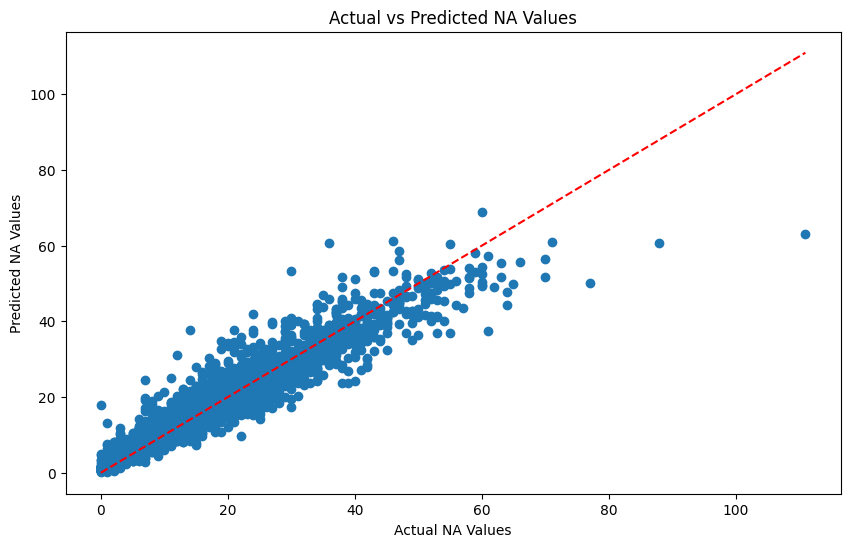

In [62]:
# this the plot of actual vs predicted values



plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual NA Values")
plt.ylabel("Predicted NA Values")
plt.title("Actual vs Predicted NA Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add a diagonal line
plt.show()